# Food Bank Problem

In [81]:
import sys
sys.path.insert(1, '../../functions')
import importlib
import numpy as np
import nbformat
import plotly.express
import plotly.express as px
import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt
import food_bank_functions
import food_bank_bayesian
from food_bank_functions import *
from food_bank_bayesian import *
importlib.reload(food_bank_functions)
importlib.reload(food_bank_bayesian)

<module 'food_bank_bayesian' from '../../functions\\food_bank_bayesian.py'>

In [82]:
max_n = 100
grid_size = .01

In [83]:
mean = 15
variance = 3
num_bins = 10
samples = np.random.normal(15,3,100000)

min_samples = np.floor(min(samples))
max_samples = np.ceil(max(samples))
print(min_samples, max_samples)

1.0 28.0


In [84]:
bins = np.digitize(samples, np.arange(min_samples, max_samples+1, (max_samples - min_samples + 1) / num_bins))
support = np.arange(min_samples, max_samples+1, (max_samples - min_samples + 1) / num_bins)
support = np.append(support, max(samples))
print(support)
vals = np.zeros(len(support))

for i in bins:
    vals[i] += 1
vals = vals / np.sum(vals)

[ 1.          3.8         6.6         9.4        12.2        15.
 17.8        20.6        23.4        26.2        27.16811974]


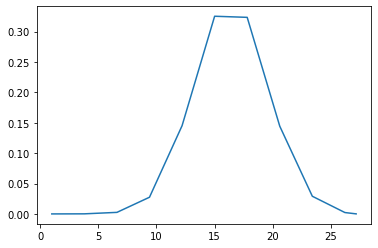

In [86]:
plt.plot(support, vals)

In [87]:
max_budget = mean*max_n

b_grid = np.arange(0, max_budget+grid_size, grid_size)
opt_policy, v_fn = bayes_opt(max_n, max_budget, b_grid, grid_size)

Step number: 99


../../functions\food_bank_bayesian.py:40: RuntimeWarning: divide by zero encountered in log
  v_fn[t,b] = (1/2)*np.log(policy(opt_policy[t,b],current_budget,1)/1) + (1/2)*np.log(policy(opt_policy[t,b],current_budget,2)/2)


Step number: 98


../../functions\food_bank_bayesian.py:46: RuntimeWarning: divide by zero encountered in log
  q_vals = np.log(b_grid[0:(b+1)]) + np.flip(v_fn[t+1,0:(b+1)])
../../functions\food_bank_bayesian.py:56: RuntimeWarning: divide by zero encountered in log
  v_fn[t,b] = (1/2)*(np.log(policy(opt_policy[t,b],current_budget,1)/1)+v_fn[t+1, new_budget_one]) \
../../functions\food_bank_bayesian.py:57: RuntimeWarning: divide by zero encountered in log
  + (1/2)*(np.log(policy(opt_policy[t,b],current_budget,2)/2)+v_fn[t+1, new_budget_two])


Step number: 97
Step number: 96
Step number: 95
Step number: 94
Step number: 93
Step number: 92
Step number: 91
Step number: 90
Step number: 89
Step number: 88
Step number: 87
Step number: 86
Step number: 85
Step number: 84
Step number: 83
Step number: 82
Step number: 81
Step number: 80
Step number: 79
Step number: 78
Step number: 77
Step number: 76
Step number: 75
Step number: 74
Step number: 73
Step number: 72
Step number: 71
Step number: 70
Step number: 69
Step number: 68
Step number: 67
Step number: 66
Step number: 65
Step number: 64
Step number: 63
Step number: 62
Step number: 61
Step number: 60
Step number: 59
Step number: 58
Step number: 57
Step number: 56
Step number: 55
Step number: 54
Step number: 53
Step number: 52
Step number: 51
Step number: 50
Step number: 49
Step number: 48
Step number: 47
Step number: 46
Step number: 45
Step number: 44
Step number: 43
Step number: 42
Step number: 41
Step number: 40
Step number: 39
Step number: 38
Step number: 37
Step number: 36
Step num

In [88]:
np.savetxt('../../data/gaussian/opt_policy' + '_mean_'+str(mean)+'_var_'+str(var)+'.csv', opt_policy, delimiter=",")
np.savetxt('../../data/gaussian/v_est' + '_mean_'+str(mean)+'_var_'+str(var)+'.csv', v_fn, delimiter=",")

NameError: name 'var' is not defined